In [ ]:
import pickle
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_5_rose_retinex.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_10_rose_retinex.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_15_rose_retinex.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_20_rose_retinex.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_5_imposter_rose_retinex_true_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_10_imposter_rose_retinex_true_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_15_imposter_rose_retinex_true_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_20_imposter_rose_retinex_true_2.pickle' './'

In [ ]:
with open('X_5_imposter_rose_retinex_true_2.pickle', 'rb') as handle:
  X_5_imposter = pickle.load(handle)

In [ ]:
with open('X_10_imposter_rose_retinex_true_2.pickle', 'rb') as handle:
  X_10_imposter = pickle.load(handle)

In [ ]:
with open('X_15_imposter_rose_retinex_true_2.pickle', 'rb') as handle:
  X_15_imposter = pickle.load(handle)

In [ ]:
with open('X_20_imposter_rose_retinex_true_2.pickle', 'rb') as handle:
  X_20_imposter = pickle.load(handle)

In [ ]:
with open('X_5_rose_retinex.pickle', 'rb') as handle:
  X_5 = pickle.load(handle)

In [ ]:
with open('X_10_rose_retinex.pickle', 'rb') as handle:
  X_10 = pickle.load(handle)

In [ ]:
with open('X_15_rose_retinex.pickle', 'rb') as handle:
  X_15 = pickle.load(handle)

In [ ]:
with open('X_20_rose_retinex.pickle', 'rb') as handle:
  X_20 = pickle.load(handle)

In [ ]:
y = np.array([0]*X_5.shape[0] + [1]*X_5_imposter.shape[0])

In [ ]:
X_5_total = np.vstack((X_5, X_5_imposter))
del X_5
del X_5_imposter
X_10_total = np.vstack((X_10, X_10_imposter))
del X_10
del X_10_imposter
X_15_total = np.vstack((X_15, X_15_imposter))
del X_15
del X_15_imposter
X_20_total = np.vstack((X_20, X_20_imposter))
del X_20
del X_20_imposter

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train_5,  X_test_5, y_train_5, y_test_5 = train_test_split(X_5_total, y, test_size = 0.2, random_state=42)
del X_5_total
X_train_10,  X_test_10, y_train_10, y_test_10 = train_test_split(X_10_total, y, test_size = 0.2, random_state=42)
del X_10_total
X_train_15,  X_test_15, y_train_15, y_test_15 = train_test_split(X_15_total, y, test_size = 0.2, random_state=42)
del X_15_total
X_train_20,  X_test_20, y_train_20, y_test_20 = train_test_split(X_20_total, y, test_size = 0.2, random_state=42)
del X_20_total

In [ ]:
False in (y_train_10 == y_train_15)

False

In [ ]:
import tensorflow as tf
# import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# SIMPLE NET

In [ ]:
def simple_net(n_channels = 2):
  simple_net = tf.keras.Sequential()
  simple_net.add(tf.keras.layers.Input((112, 112, n_channels)))
  simple_net.add(tf.keras.layers.Conv2D(16, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(32, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(64, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(128, (3, 3)))
  simple_net.add(tf.keras.layers.BatchNormalization())
  simple_net.add(tf.keras.layers.Activation('relu'))
  simple_net.add(tf.keras.layers.MaxPooling2D())
  simple_net.add(tf.keras.layers.Conv2D(256, (5, 5)))
  simple_net.add(tf.keras.layers.Flatten())
  simple_net.add(tf.keras.layers.Reshape((1,-1)))
  return simple_net

In [ ]:
simple_net_5 = simple_net()
simple_net_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 53, 53, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 32)        0

In [ ]:
simple_net_10 = simple_net()
simple_net_10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization_4 (Batch (None, 110, 110, 16)      64        
_________________________________________________________________
activation_4 (Activation)    (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 53, 53, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 53, 53, 32)       

In [ ]:
simple_net_15 = simple_net()
simple_net_15.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization_8 (Batch (None, 110, 110, 16)      64        
_________________________________________________________________
activation_8 (Activation)    (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 53, 53, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 53, 53, 32)       

In [ ]:
simple_net_20 = simple_net()
simple_net_20.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 110, 110, 16)      304       
_________________________________________________________________
batch_normalization_12 (Batc (None, 110, 110, 16)      64        
_________________________________________________________________
activation_12 (Activation)   (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 53, 53, 32)        4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 53, 53, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 53, 53, 32)       

In [ ]:
def min_pool2d(x):
    min_x = -K.pool2d(-x, pool_size=(4, 1), strides=(1, 1))
    return min_x
# def min_pool2d_output_shape(input_shape):
#     shape = list(input_shape)
#     shape[1] /= 2
#     shape[2] /= 2
#     return tuple(shape)

In [ ]:
concat = tf.keras.layers.Concatenate(axis=1)([simple_net_5.output, simple_net_10.output, simple_net_15.output, simple_net_20.output])
# concat.shape
reshap = tf.keras.layers.Reshape((4, 256, 1))(concat)
reshap.shape
max = tf.keras.layers.MaxPooling2D(pool_size=(4, 1), strides=(1, 1))(reshap)
ave = tf.keras.layers.AveragePooling2D(pool_size=(4, 1), strides=(1, 1))(reshap)
min = tf.keras.layers.Lambda(min_pool2d)(reshap)

In [ ]:
max_flatten = tf.keras.layers.Flatten()(max)
ave_flatten = tf.keras.layers.Flatten()(ave)
min_flatten = tf.keras.layers.Flatten()(min)

In [ ]:
concat2 = tf.keras.layers.Concatenate(axis=1)([max_flatten, ave_flatten, min_flatten])
concat2.shape

TensorShape([None, 768])

In [ ]:
sig = tf.keras.layers.Dense(1, activation='sigmoid')(concat2)

In [ ]:
model = tf.keras.Model([simple_net_5.input, simple_net_10.input, simple_net_15.input, simple_net_20.input], sig)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 112, 2) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 112, 112, 2) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 112, 112, 2) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 112, 112, 2) 0                                            
______________________________________________________________________________________________

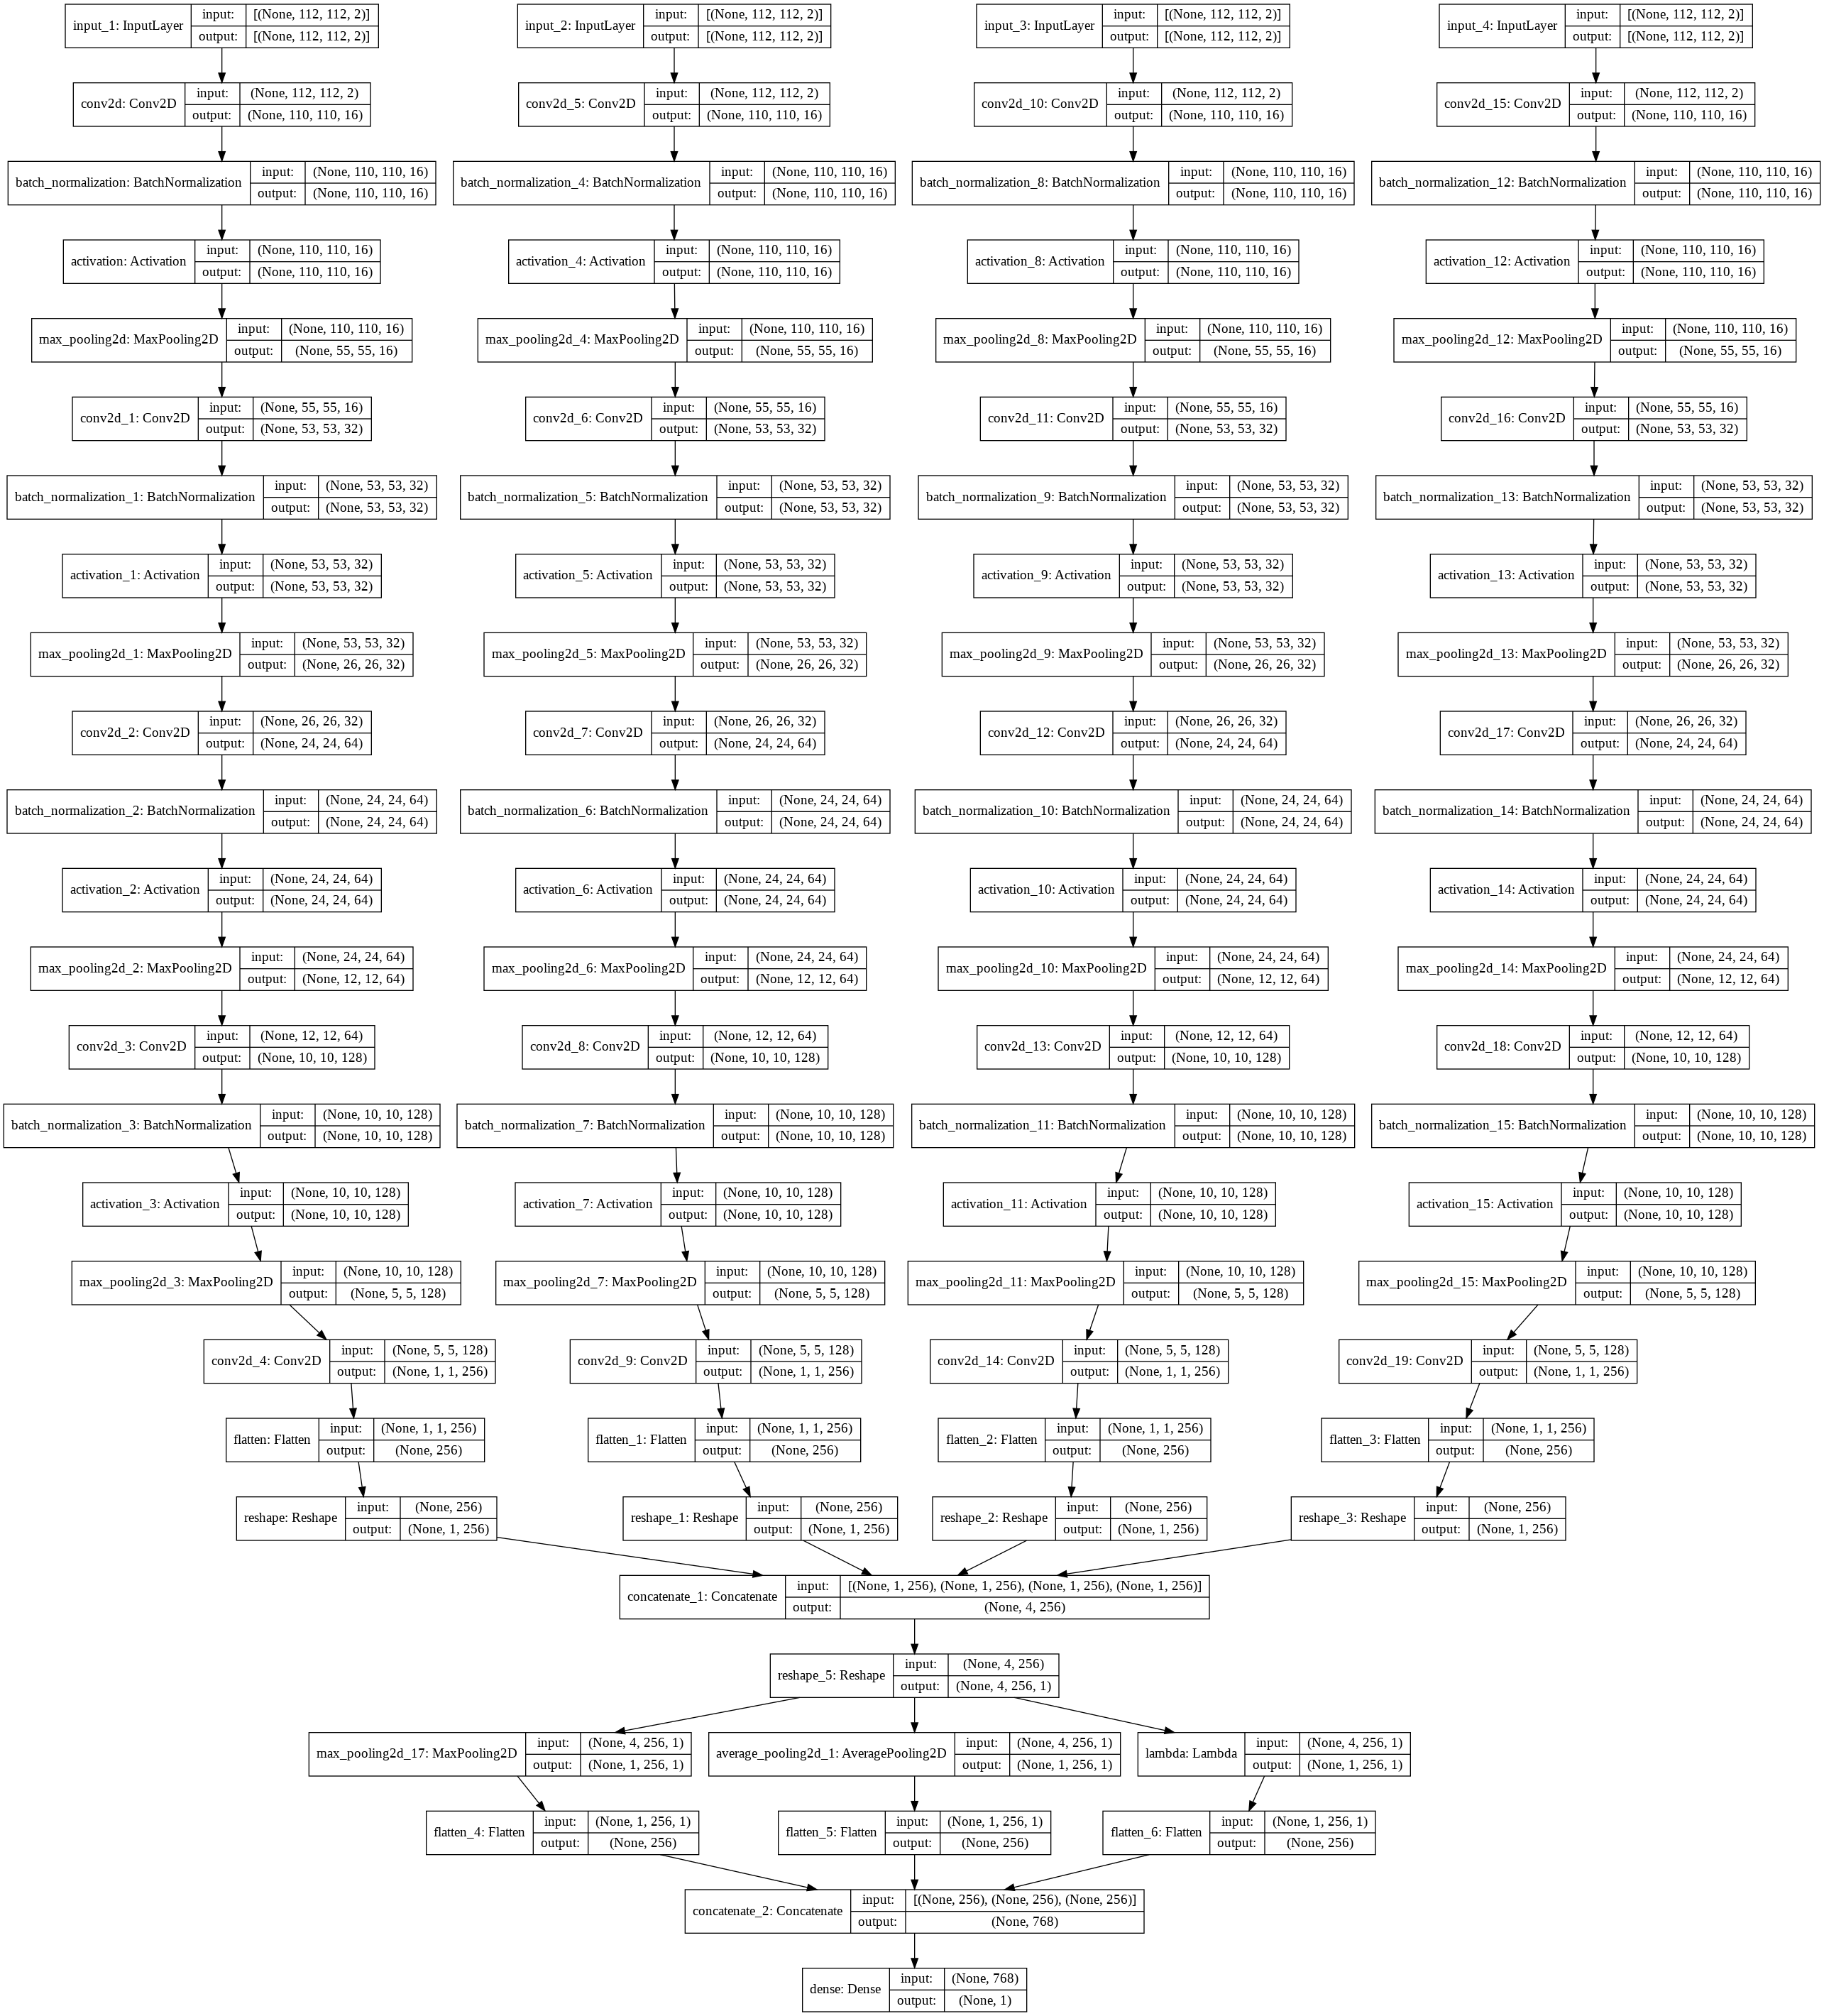

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
INIT_LR = 1e-3
BS = 8
EPOCHS = 15

In [ ]:
# opt = Adam(lr=INIT_LR)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
H = model.fit([X_train_5, X_train_10, X_train_15, X_train_20], y_train_5, batch_size=BS,
	validation_split=0.2,
	epochs=EPOCHS)

Epoch 1/15
1949/1949 [==============================] - 58s 20ms/step - loss: 1.5848 - accuracy: 0.6113 - val_loss: 0.5123 - val_accuracy: 0.7329
Epoch 2/15
1949/1949 [==============================] - 36s 18ms/step - loss: 0.5109 - accuracy: 0.7540 - val_loss: 0.4630 - val_accuracy: 0.8263
Epoch 3/15
1949/1949 [==============================] - 36s 19ms/step - loss: 0.3871 - accuracy: 0.8357 - val_loss: 0.2950 - val_accuracy: 0.8948
Epoch 4/15
1949/1949 [==============================] - 36s 18ms/step - loss: 0.3069 - accuracy: 0.8728 - val_loss: 0.3469 - val_accuracy: 0.8958
Epoch 5/15
1949/1949 [==============================] - 36s 18ms/step - loss: 0.2334 - accuracy: 0.9088 - val_loss: 0.2728 - val_accuracy: 0.9015
Epoch 6/15
1949/1949 [==============================] - 36s 18ms/step - loss: 0.1932 - accuracy: 0.9271 - val_loss: 0.2145 - val_accuracy: 0.9287
Epoch 7/15
1949/1949 [==============================] - 36s 18ms/step - loss: 0.1743 - accuracy: 0.9362 - val_loss: 0.2324 -

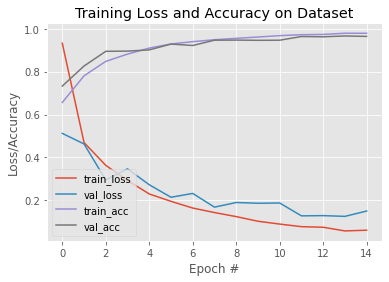

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
model.evaluate([X_test_5, X_test_10, X_test_15, X_test_20], y_test_5, batch_size=BS)

609/609 [==============================] - 5s 8ms/step - loss: 0.1527 - accuracy: 0.9653


[0.1526762694120407, 0.9653048515319824]

In [ ]:
# big_model_24_05_our.h5 VL model
model.save('of_fbb_msrcr_vl.h5')

In [ ]:
!cp 'of_fbb_msrcr_vl.h5' '/content/drive/MyDrive/RoseYoutu/of_fbb_msrcr_vl.h5'

# Testing

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/of_fbb_msrcr_vl.h5' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_5_nuaa_retinex_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_10_nuaa_retinex_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_15_nuaa_retinex_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_20_nuaa_retinex_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_5_imposter_nuaa_retinex_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_10_imposter_nuaa_retinex_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_15_imposter_nuaa_retinex_2.pickle' './'

In [ ]:
!cp '/content/drive/MyDrive/RoseYoutu/X_20_imposter_nuaa_retinex_2.pickle' './'

In [ ]:
with open('X_5_imposter_nuaa_retinex_2.pickle', 'rb') as handle:
  X_5_imposter = pickle.load(handle)

In [ ]:
with open('X_10_imposter_nuaa_retinex_2.pickle', 'rb') as handle:
  X_10_imposter = pickle.load(handle)

In [ ]:
with open('X_15_imposter_nuaa_retinex_2.pickle', 'rb') as handle:
  X_15_imposter = pickle.load(handle)

In [ ]:
with open('X_20_imposter_nuaa_retinex_2.pickle', 'rb') as handle:
  X_20_imposter = pickle.load(handle)

In [ ]:
with open('X_5_nuaa_retinex_2.pickle', 'rb') as handle:
  X_5 = pickle.load(handle)

In [ ]:
with open('X_10_nuaa_retinex_2.pickle', 'rb') as handle:
  X_10 = pickle.load(handle)

In [ ]:
with open('X_15_nuaa_retinex_2.pickle', 'rb') as handle:
  X_15 = pickle.load(handle)

In [ ]:
with open('X_20_nuaa_retinex_2.pickle', 'rb') as handle:
  X_20 = pickle.load(handle)

In [ ]:
y = np.array([0]*X_5.shape[0] + [1]*X_5_imposter.shape[0])

In [ ]:
X_5_total = np.vstack((X_5, X_5_imposter))
del X_5
del X_5_imposter
X_10_total = np.vstack((X_10, X_10_imposter))
del X_10
del X_10_imposter
X_15_total = np.vstack((X_15, X_15_imposter))
del X_15
del X_15_imposter
X_20_total = np.vstack((X_20, X_20_imposter))
del X_20
del X_20_imposter

In [ ]:
model =tf.keras.models.load_model('of_fbb_msrcr_vl.h5')

In [ ]:
model.evaluate([X_5_total, X_10_total, X_15_total, X_20_total], y, batch_size=8)

1868/1868 [==============================] - 27s 6ms/step - loss: 2.4059 - accuracy: 0.6929


[2.4059228897094727, 0.6928638219833374]

In [ ]:
INPUT_SIZE = 112

In [ ]:
y_pred = []
for _ in range(X_5_total.shape[0]):
  pred = model.predict([X_5_total[_].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X_10_total[_].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X_15_total[_].reshape(1, INPUT_SIZE, INPUT_SIZE, 2), X_20_total[_].reshape(1, INPUT_SIZE, INPUT_SIZE, 2)]).flatten()[0]
  if pred > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7018    0.8738    0.7784      9222
           1     0.6632    0.4010    0.4998      5716

    accuracy                         0.6929     14938
   macro avg     0.6825    0.6374    0.6391     14938
weighted avg     0.6870    0.6929    0.6718     14938



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
CM = confusion_matrix(y, y_pred)

In [ ]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [ ]:
APCER = FP / (TN + FP)
BPCER = FN / (TP + FN)

In [ ]:
APCER, BPCER

(0.1262199089134678, 0.5990202939118264)

In [ ]:
(APCER + BPCER) / 2

0.3626201014126471